BREAST CANCER DETECTION AND CLASSIFICATION

IMPORTING ALL THE LIBRARIES AND MODULES TO WORK ON THE EVERY SUPERVISED LEARNING TECHNIQUE

In [1]:
import pandas as pd
import sklearn as sk
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
import seaborn as sns
from matplotlib import pyplot as plt

#TO ENCODE THE DATATYPE OF THE VARIABLES OR OBJECTS
from sklearn.preprocessing import LabelEncoder

#TO SCALE THE DATA
from sklearn.preprocessing import StandardScaler

#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import  RandomForestClassifier

#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

#K- NEAREST NEIGHBOURS CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# TO READ THE DATA  FROM A FILE
df =  pd.read_csv('data.csv')

# TO GET SOME INFORMATION ABOUT THE DATA
df.info()

# TO DROP THE COLUMN WITH ALL THE MISSING VALUES
df = df.dropna(axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
#It would give you summary statistics of the numerical columns in that dataframe.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# IT RETRIEVES FIRST 5 RECORDS
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# IT RETRIEVES LAST FIVE RECORDS
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
# To get the number of rows and columns in the datasheet
df.shape

(569, 32)

<Axes: xlabel='count', ylabel='diagnosis'>

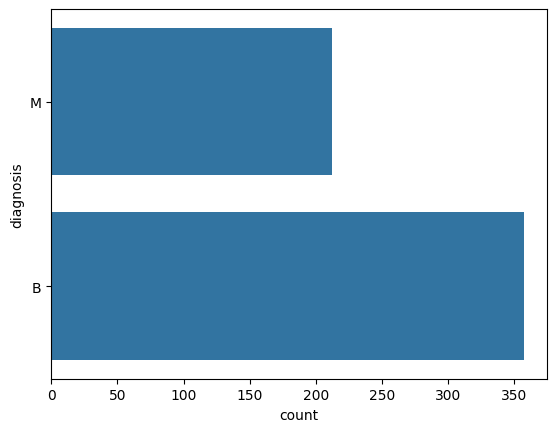

In [7]:
#visualize the count
sns.countplot(df['diagnosis'], label = 'count')

In [8]:
#To check if their is any missing data 
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#checking the distrubution of the target variable
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [11]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
#labelEncoder_Y = LabelEncoder()
#df.iloc[:,1] = labelEncoder_Y.fit_transform(df.iloc[:,1].values)



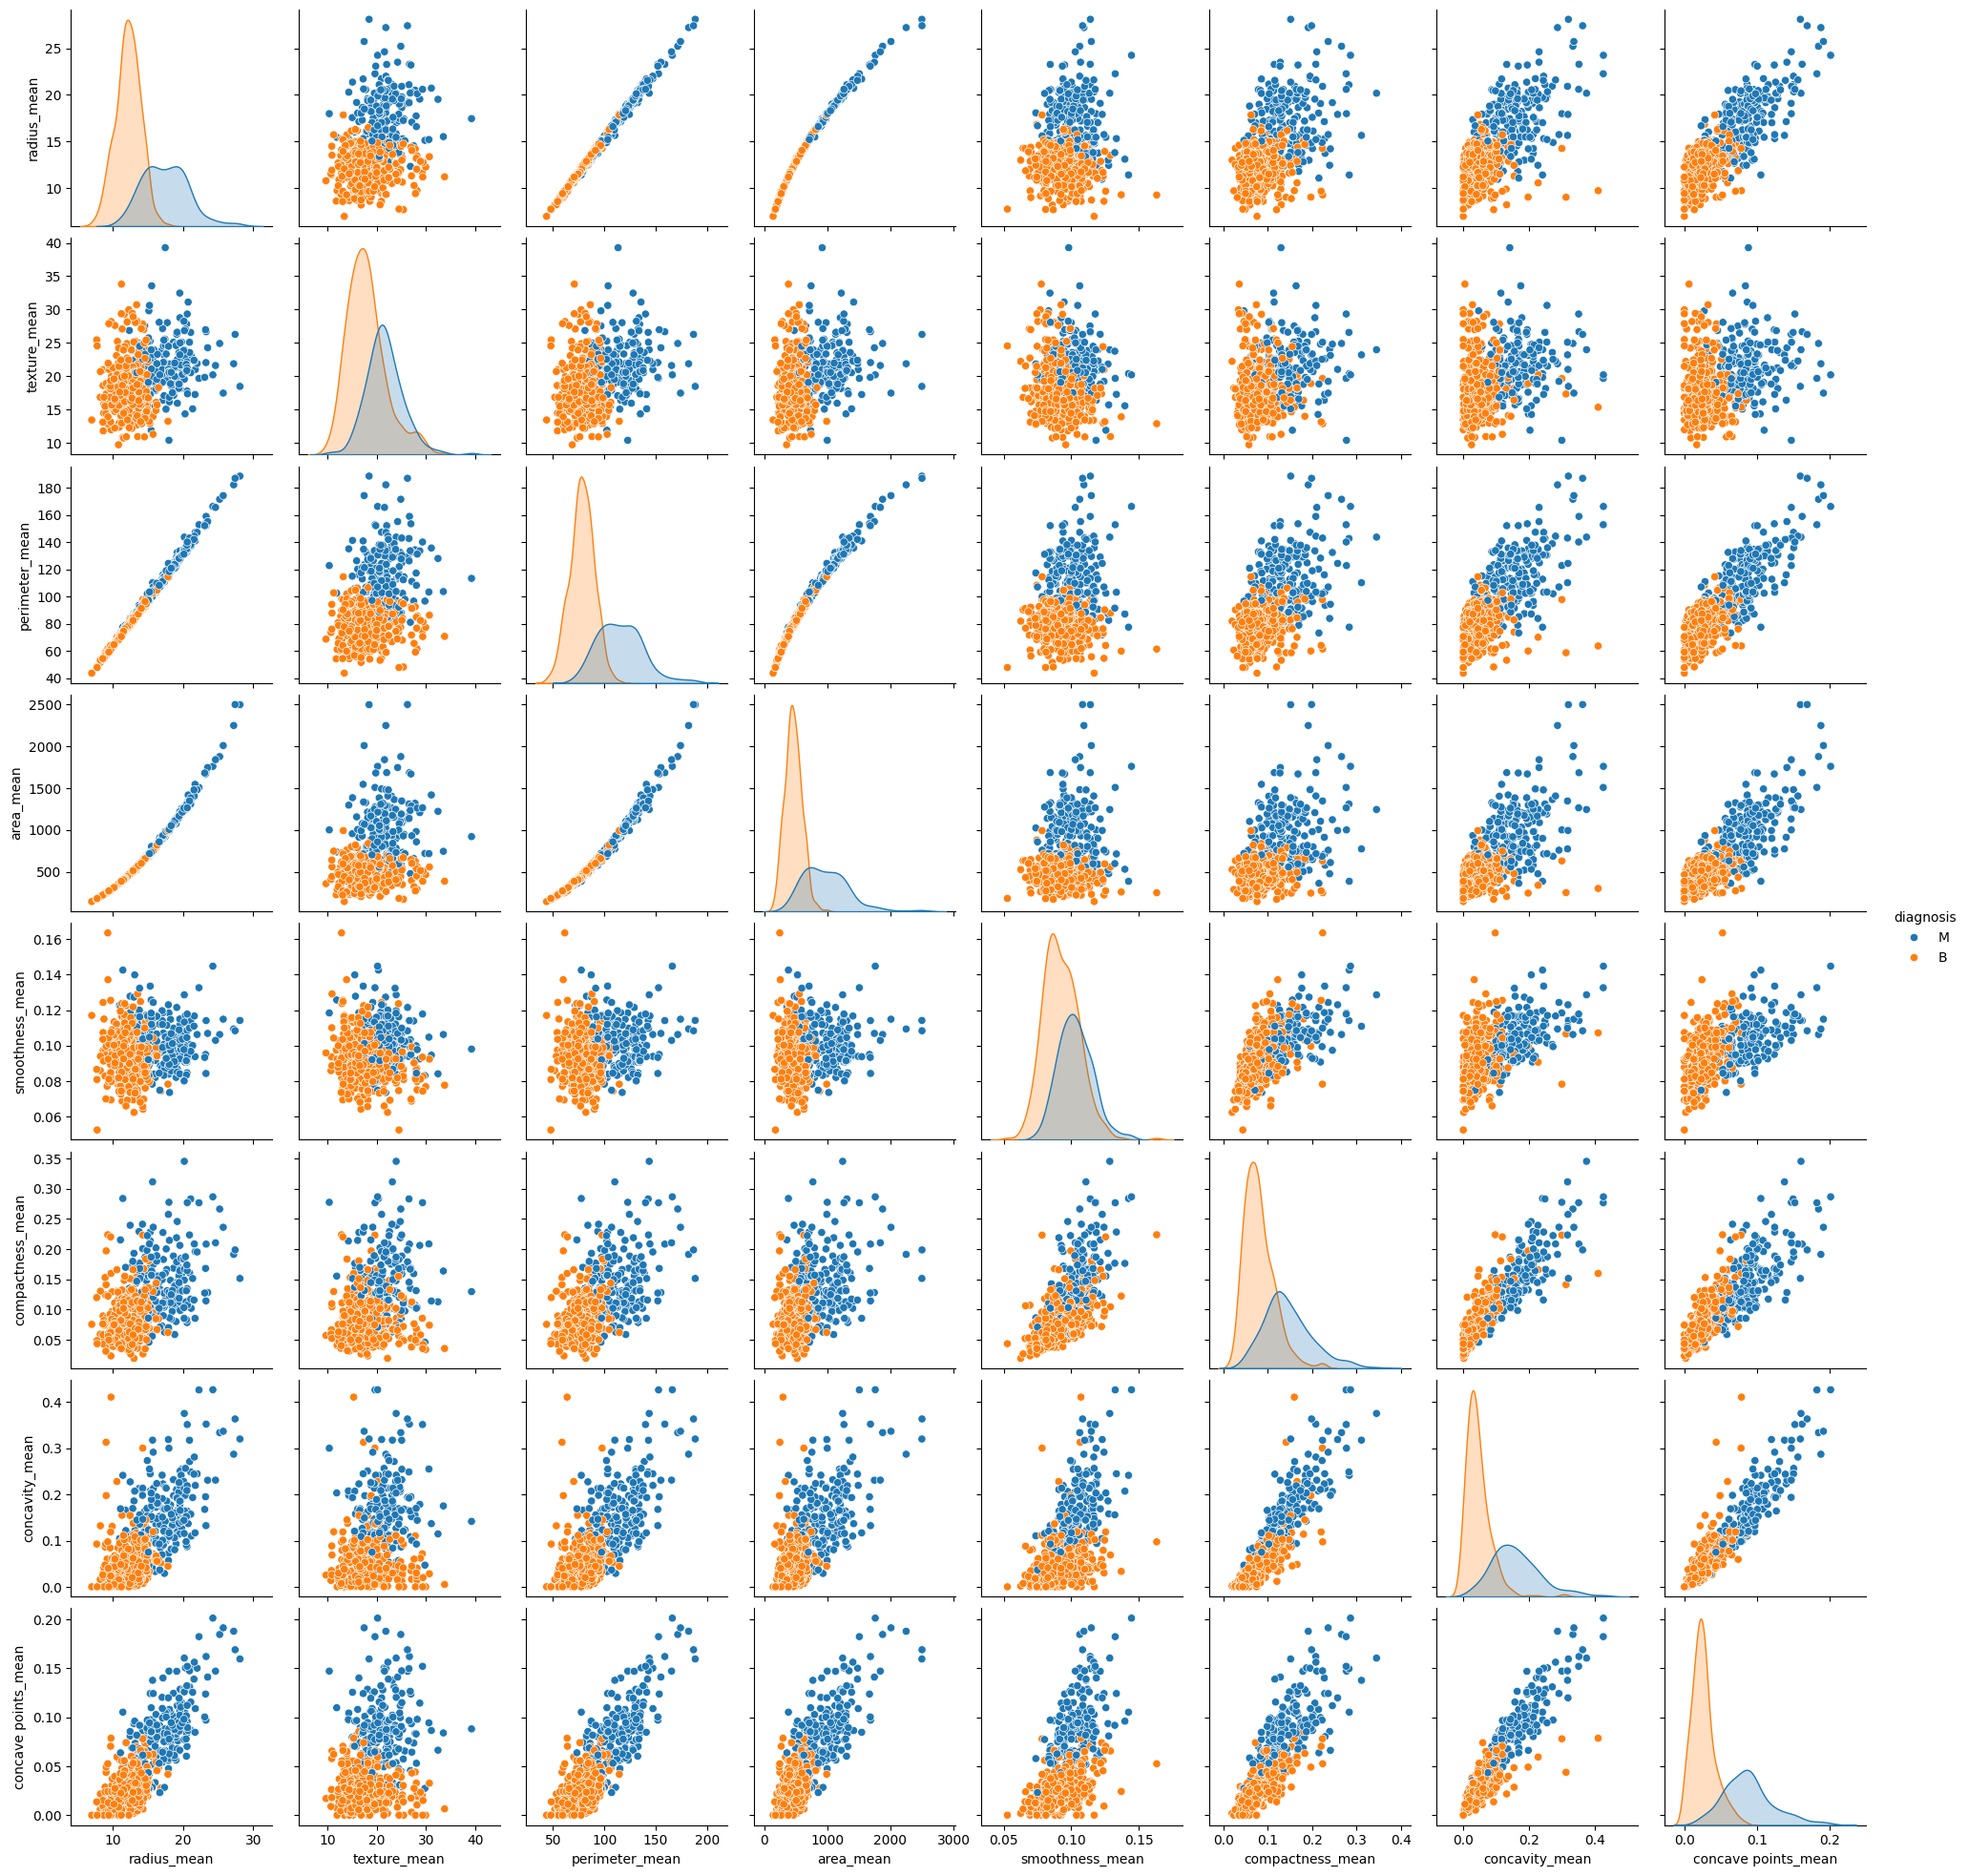

In [13]:
sns.pairplot(df.iloc[:,1:10],hue ='diagnosis')

In [14]:
# Get the correlation of the columns
#df.iloc[:,1:12].corr()

In [15]:
#visualize correlations
#plt.figure(figsize= (15,15)) 
#sns.heatmap(df.iloc[:,1:20].corr(), annot=True, fmt = '.0%')

In [16]:
#split the dataset into dependent (X) and independent dataset (Y) 
X = df.iloc[:,2:31].values #features # dependent
Y = df.iloc[:,1].values #diagnosis #independent

In [17]:
#We are going to train our model using 70% training data and 30% testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=2)


In [18]:
#Scale the data (Feature Scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [19]:

#RandomForest  Classifier
#forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)
#forest.fit(X_train,Y_train)
#print('RandomForestClassifier training accuracy = ',forest.score(X_train,Y_train))


#KNN(K-Nearest-Neighbours)
KNN = KNeighborsClassifier(n_neighbors=10)     
KNN.fit(X_train, Y_train)
print("KNN training Accuracy = ",KNN.score(X_train,Y_train)) 


    

KNN training Accuracy =  0.9698492462311558


In [20]:

#KNN(K-Nearest-Neighbours)
#KNN = KNeighborsClassifier(n_neighbors=10)     
#KNN.fit(X_train, Y_train)
#print("KNN training Accuracy = ",KNN.score(X_train,Y_train)) 



#Decision Tree
#tree = DecisionTreeClassifier(criterion='entropy',random_state=2)
#tree.fit(X_train, Y_train)
#print('DecisionTreeClassifier training accuracy = ',tree.score(X_train,Y_train))
       
#Logistic Regression  Model
#log = LogisticRegression(random_state=2)
#log.fit(X_train,Y_train)
#print('[0]LogisticRegression trainig accuracy =',log.score(X_train,Y_train))
        

In [21]:
cm = confusion_matrix(Y_test,KNN.predict(X_test))

TP = cm[0][0] #True Positives
TN = cm[1][1] #True Negatives
FN = cm[1][0] #False Negatives
FP = cm[0][1] #False Positives

print("Confusion Matrix")
print(cm)
print("Testing Accruacy = ",(TP+TN)/(TP+FP+FN+TN))


Confusion Matrix
[[104   0]
 [  7  60]]
Testing Accruacy =  0.9590643274853801


In [22]:
print(classification_report(Y_test, KNN.predict(X_test)))
print(accuracy_score(Y_test, KNN.predict(X_test)))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       104
           M       1.00      0.90      0.94        67

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

0.9590643274853801


In [23]:
pred = KNN.predict(X_test)
print(pred)
print()
print(Y_test)

['B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B']

['B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M'
 'B' 'M' 'B'